In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from scipy.stats import kurtosis, skew


In [2]:
path = "dataset/"
train = pd.read_csv(path+"train.csv")
test = pd.read_csv(path+"test.csv")

In [3]:
train.loc[train.Alley == 'NaN','Alley']='NO'
train.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [4]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


<h3>Distribution of the target variable</h3>


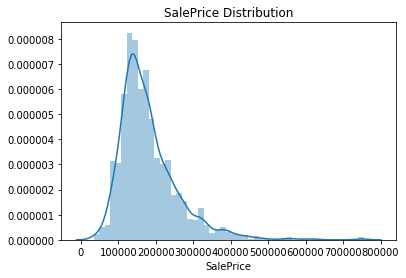

Kurtosis : 6.509812011089439
Skewness : 1.880940746034036


In [5]:
train['SalePrice'].describe()
sns.distplot(train['SalePrice']).set_title("SalePrice Distribution")
plt.show()
print( 'Kurtosis : {}'.format( kurtosis(train['SalePrice']) ))
print( 'Skewness : {}'.format( skew(train['SalePrice']) ))

SalePrice is right skewed. 
<font size = 4>Applying log transformation </font>

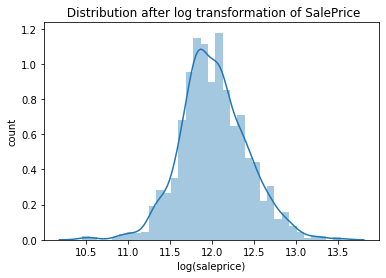

Kurtosis : 0.8026555069117713
Skewness : 0.1212103673013655


In [6]:

sns.distplot(np.log(train['SalePrice'])).set_title(" Distribution after log transformation of SalePrice")
plt.xlabel("log(saleprice)")
plt.ylabel("count")
plt.show()
print( 'Kurtosis : {}'.format( kurtosis(np.log(train['SalePrice'])) ))
print( 'Skewness : {}'.format( skew(np.log(train['SalePrice'])) ))

Ater transformation we can see that the SalePrice is normally distributed

<h1>Handling Missing Values</h1>

We can drop Id column from the training data


<h5>Columns with missing values :</h5>

In [7]:
nan_df=train.loc[:, train.isna().any()]
nan_df.shape
nan_df.columns

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

<h3>Differentiating Quantative and Categorical features</h3>

In [9]:
quantitative = [f for f in train.columns if train.dtypes[f] != 'object']
quantitative.remove('SalePrice')
quantitative.remove('Id')
qualitative = [f for f in train.columns if train.dtypes[f] == 'object']

In [10]:
print(quantitative)
print(qualitative)

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCon

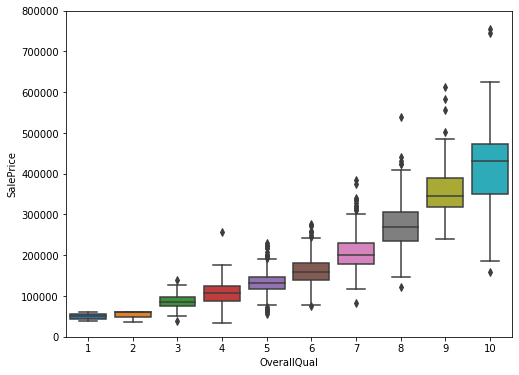

In [11]:

data = pd.concat([train['SalePrice'], train["OverallQual"]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x="OverallQual", y="SalePrice", data=data)

fig.axis(ymin=0, ymax=800000);

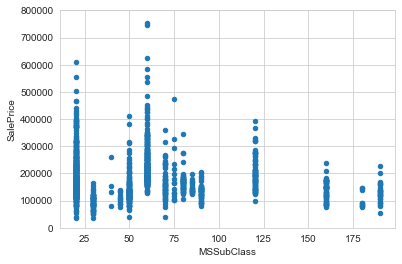

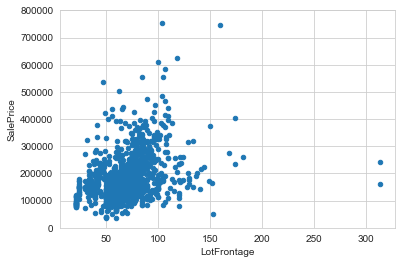

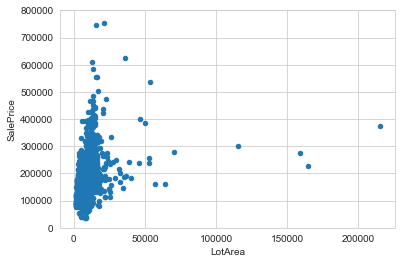

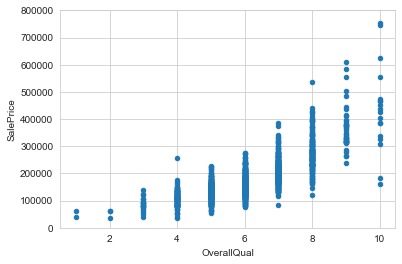

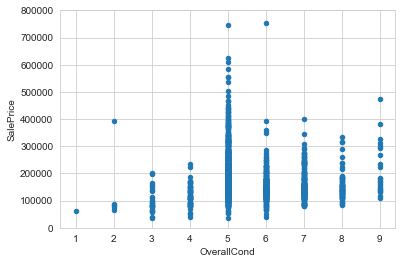

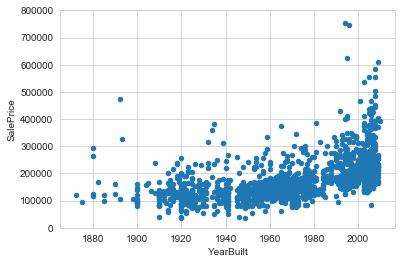

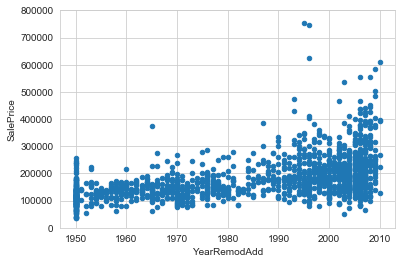

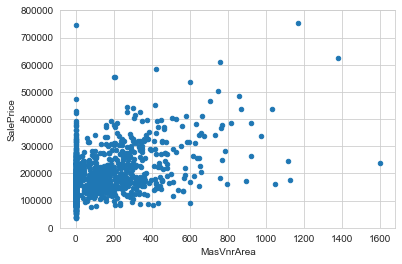

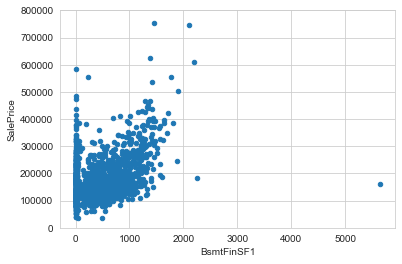

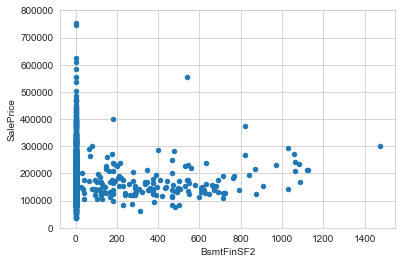

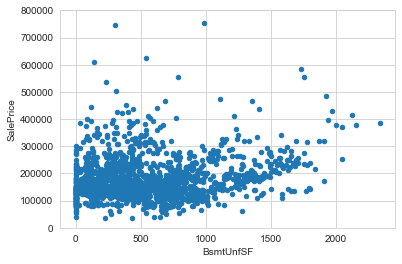

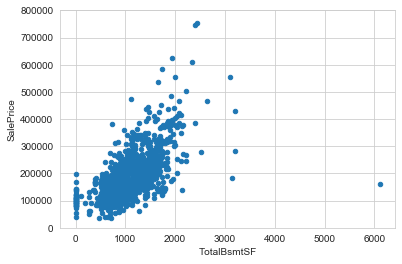

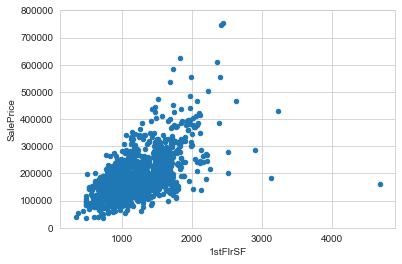

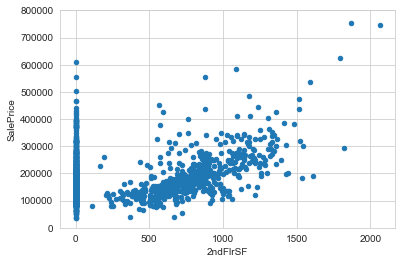

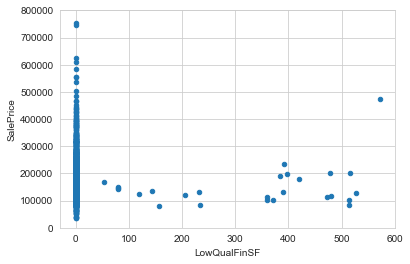

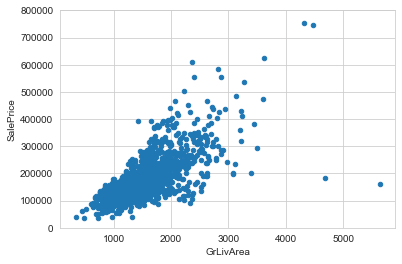

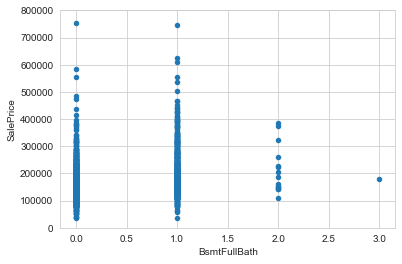

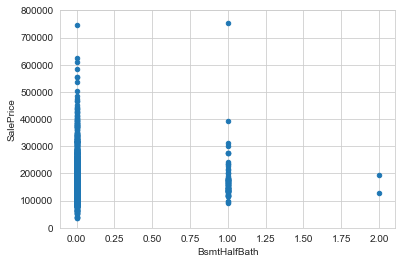

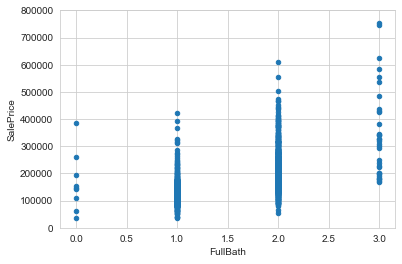

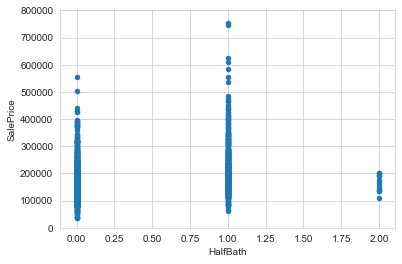

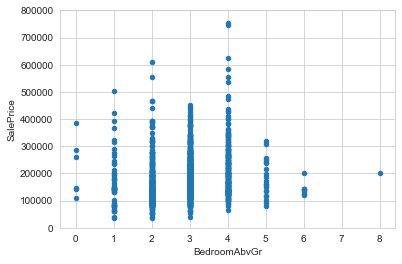

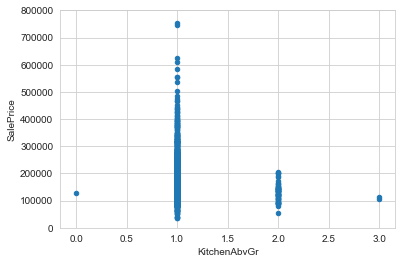

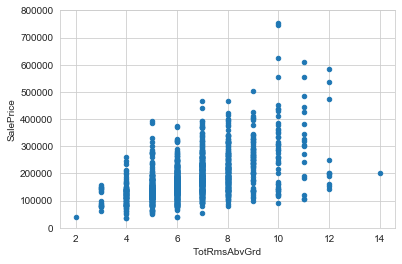

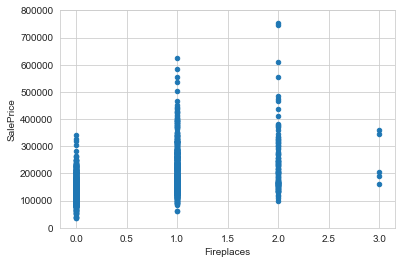

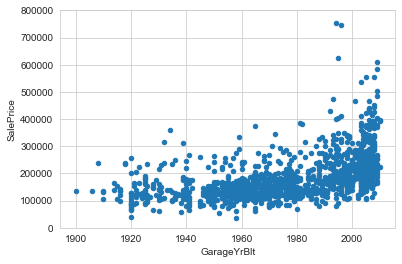

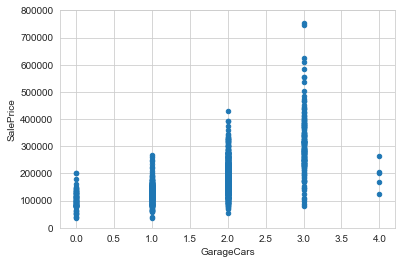

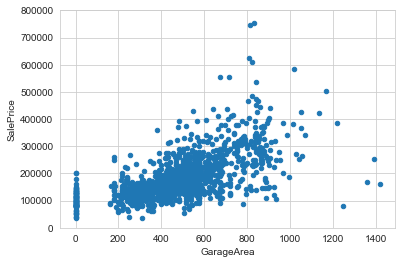

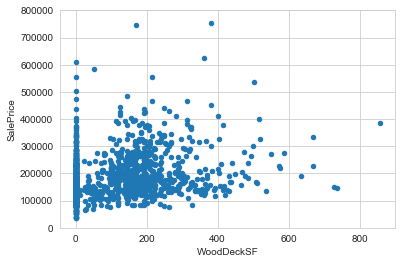

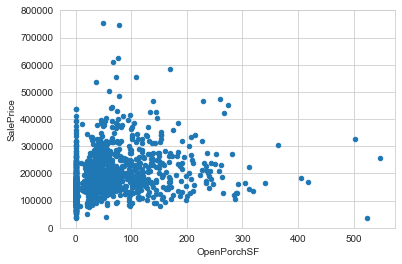

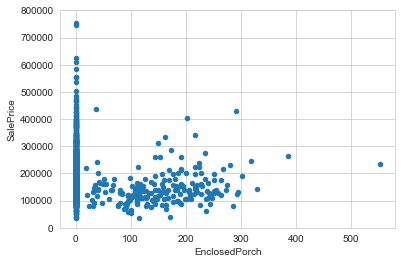

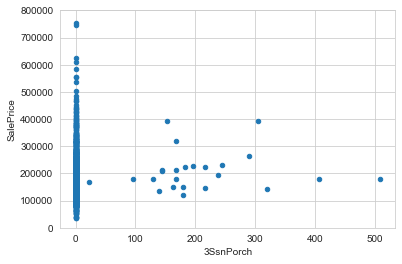

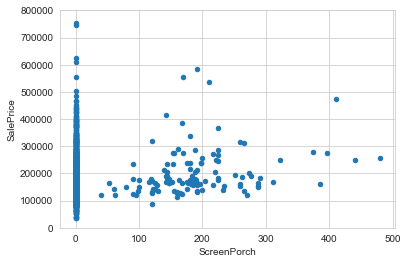

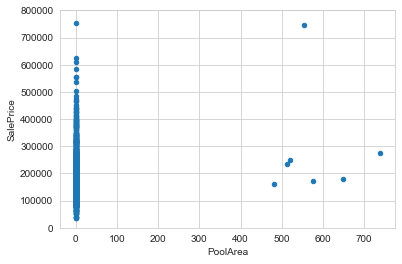

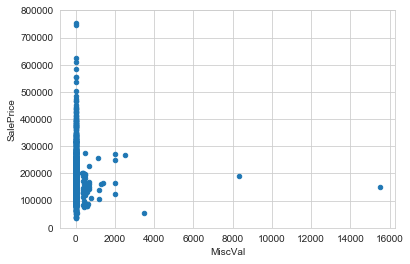

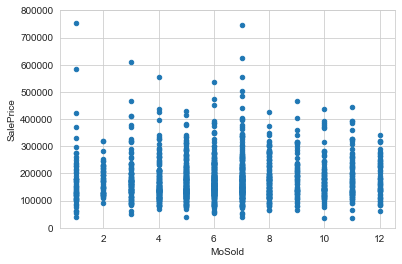

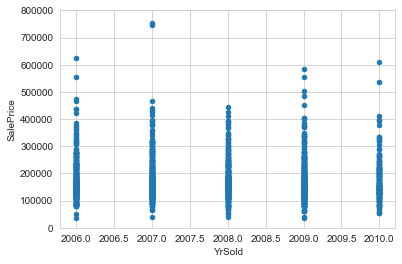

In [15]:
for var in quantitative:
    data = pd.concat([train['SalePrice'], train[var]], axis=1)
    data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));    

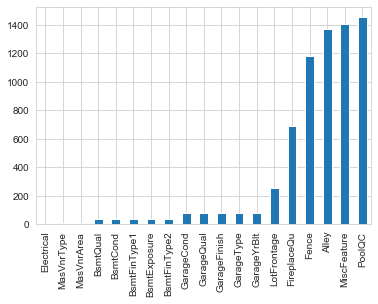

In [16]:
sns.set_style("whitegrid")
missing = train.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()

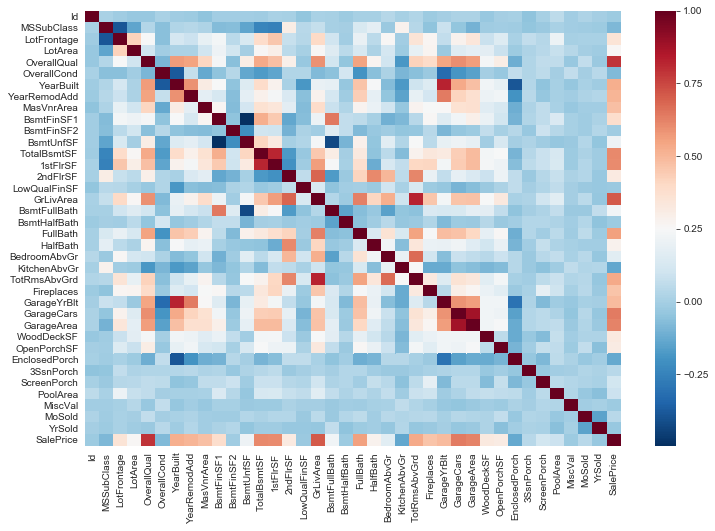

In [17]:
#to find how cols are related to each other
corr_matrix = train.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, cmap=plt.cm.RdBu_r)

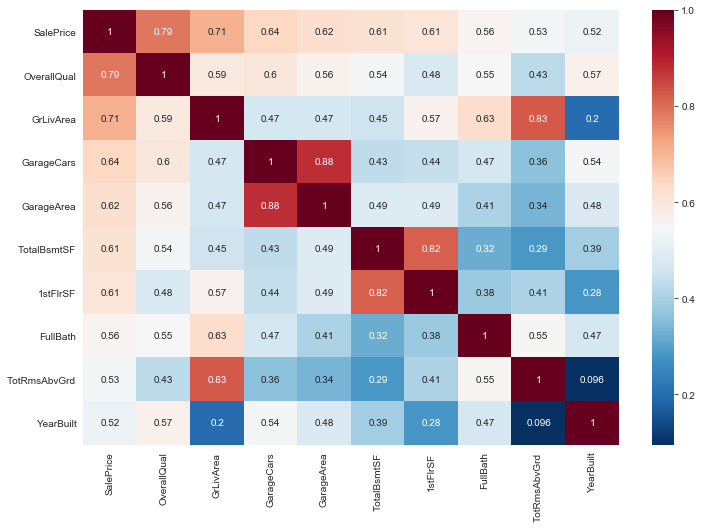

In [18]:
#the top 10 things which are affecting sale_price the most
k = 10
cols = corr_matrix.nlargest(k, 'SalePrice')['SalePrice'].index
k_corr_matrix = train[cols].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(k_corr_matrix, annot=True, cmap=plt.cm.RdBu_r)

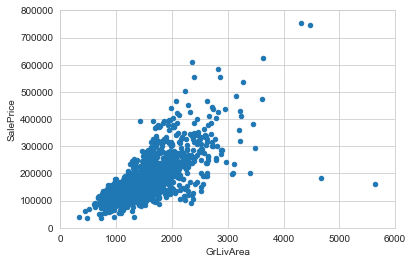

In [19]:

train.plot.scatter(x='GrLivArea', y='SalePrice', ylim=(0, 800000), xlim=(0, 6000))

In [20]:
#the right most two points are the outliers
#to remove them...note that the grlivearea is now modified
train = train[train['GrLivArea'] < 4000]

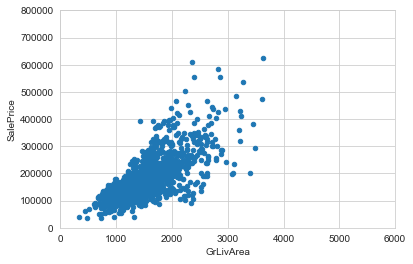

In [21]:
#plot after removeing outlier
train.plot.scatter(x='GrLivArea', y='SalePrice', ylim=(0, 800000), xlim=(0, 6000))

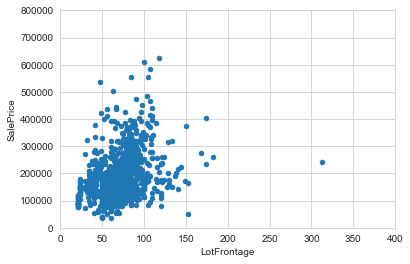

In [22]:
#verified with the scrolling plot to check for outliers
train.plot.scatter(x='LotFrontage', y='SalePrice', ylim=(0, 800000), xlim=(0, 400))

In [23]:
train = train[train['LotFrontage'] < 250]

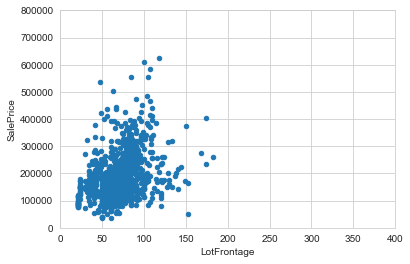

In [24]:
#plot after removing outlier
train.plot.scatter(x='LotFrontage', y='SalePrice', ylim=(0, 800000), xlim=(0, 400))

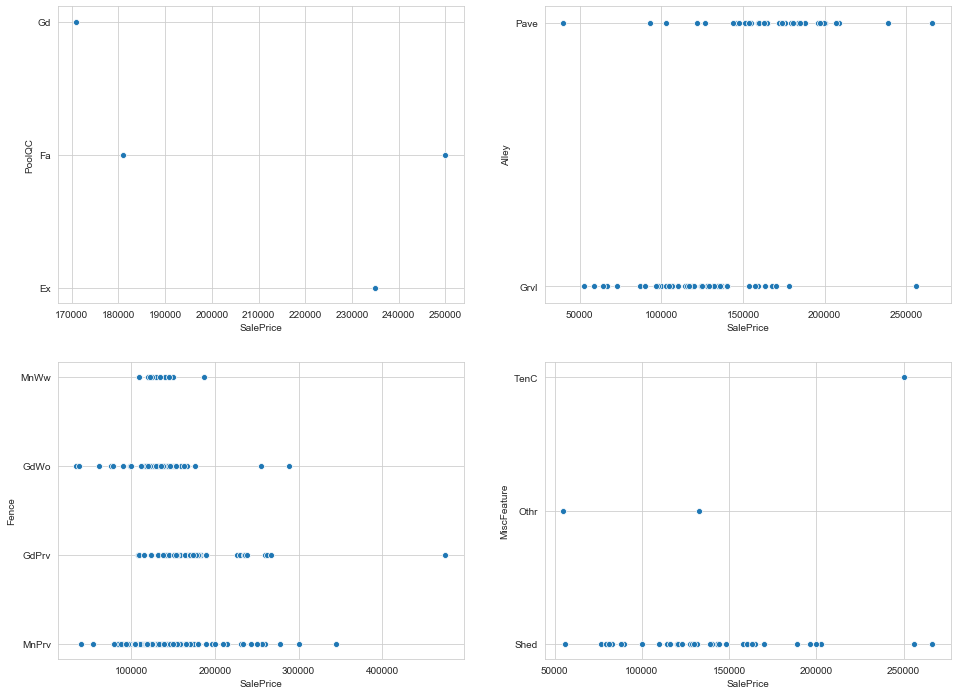

In [26]:
plt.figure(figsize=(16, 12))
for idx, f in enumerate(['PoolQC', 'Alley', 'Fence', 'MiscFeature']):
    plt.subplot(2, 2, idx+1)
    sns.scatterplot(x='SalePrice', y=f, data=train)



In [27]:
train.reset_index(drop=True, inplace=True)

X_train = train.drop(['SalePrice'], axis=1)
X_test = test
traintest =  pd.concat([X_train, test], axis=0, sort=False)
traintest.drop(['Id'], axis=1, inplace=True)
traintest.shape
#remove poolQc,Utilities,Street,MiscFeature since most of the values are NA and they dont have any pattern in it
traintest.drop(['PoolQC', 'Utilities', 'Street', 'MiscFeature', ], axis=1, inplace=True)


Columns for which NA means none replacing NA with "none", For other categorical variables fill the missing values with median

In [28]:
traintest['Alley'].fillna('None', inplace=True)
traintest['Fence'].fillna('None', inplace=True)
traintest['FireplaceQu'].fillna('None', inplace=True)
traintest['GarageQual'].fillna('None', inplace=True)
traintest['GarageFinish'].fillna('None', inplace=True)
traintest['GarageCond'].fillna('None', inplace=True)
traintest['GarageType'].fillna('None', inplace=True)
traintest['BsmtExposure'].fillna('None', inplace=True)
traintest['BsmtCond'].fillna('None', inplace=True)
traintest['BsmtQual'].fillna('None', inplace=True)
traintest['BsmtFinType2'].fillna('None', inplace=True)
traintest['BsmtFinType1'].fillna('None', inplace=True)
traintest['MasVnrType'].fillna('None', inplace=True)
traintest['HasMasVnr'] = traintest['MasVnrType'].apply(lambda x: 0 if x == 'None' else 1)
traintest['Exterior1st'] = traintest['Exterior1st'].fillna(traintest['Exterior1st'].mode()[0])
traintest['MSZoning'] = traintest.groupby(['MSSubClass'])['MSZoning'].transform(lambda x: x.fillna(x.mode()[0]))
traintest['Functional'].fillna('Typ', inplace=True)
traintest['SaleType'] = traintest['SaleType'].fillna(traintest['SaleType'].mode()[0])
traintest['Electrical'] = traintest['Electrical'].fillna(traintest['Electrical'].mode()[0])
traintest['KitchenQual'] = traintest['KitchenQual'].fillna(traintest['KitchenQual'].mode()[0])
traintest['Exterior2nd'] = traintest['Exterior2nd'].fillna(traintest['Exterior2nd'].mode()[0])

#Fill missing values of Lotrontage with median
traintest['LotFrontage'] = traintest.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))
traintest['MasVnrArea'] = traintest.groupby(['MasVnrType'])['MasVnrArea'].transform(lambda x: x.fillna(x.median()))
traintest['GarageYrBlt'] = traintest['YearBuilt'] 
traintest['TotalBsmtSF'].fillna(0, inplace=True)
traintest['BsmtUnfSF'].fillna(0, inplace=True)
traintest['BsmtFinSF1'].fillna(0, inplace=True)
traintest['BsmtFinSF2'].fillna(0, inplace=True)
traintest['BsmtFullBath'].fillna(0, inplace=True)
traintest['BsmtHalfBath'].fillna(0, inplace=True)
traintest['GarageArea'].fillna(0, inplace=True)
traintest['GarageCars'].fillna(0, inplace=True)


In [29]:
traintest['MSSubClass'] = traintest['MSSubClass'].apply(str)
traintest['YrSold'] = traintest['YrSold'].astype(str)
traintest['MoSold'] = traintest['MoSold'].astype(str)